# Feature Engineering & KNN for FiveThirtyEight College Majors Dataset

https://github.com/fivethirtyeight/data/blob/master/college-majors/recent-grads.csv

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/recent-grads.csv')

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [ ]:
# Look at how many missing values are in this dataset:
print("Missing Values:")
print(data.isnull().sum())

# The number of missing values is very small in each feature, so we do not need
# to worrying about removing features containing to many NAs. Instead, we directly
# dropped those few NA values which won't affect the general result
data_cleaned = data.dropna()

print("Cleaned Dataset:")
print(data_cleaned.head())

print("Summary Statistics of Cleaned Data:")
print(data_cleaned.describe())

Missing Values:
Rank                    0
Major_code              0
Major                   0
Total                   1
Men                     1
Women                   1
Major_category          0
ShareWomen              1
Sample_size             0
Employed                0
Full_time               0
Part_time               0
Full_time_year_round    0
Unemployed              0
Unemployment_rate       0
Median                  0
P25th                   0
P75th                   0
College_jobs            0
Non_college_jobs        0
Low_wage_jobs           0
dtype: int64
Cleaned Dataset:
   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405              

In [ ]:
import pandas as pd


# Group data by "Major"
grouped_data = data.groupby('Major')

# Engineering features by
new_features = grouped_data.agg({
    'Median': 'mean',
    'Employed': 'mean',
    'College_jobs': 'mean',
    'Unemployment_rate': 'mean'
}).reset_index()

new_features.columns = ['Major', 'Average_Earnings', 'Average_Employment', 'Average_High_Wage_Job', 'Average_Unemployment_Rate']



In [ ]:
new_features


,Major,Average_Earnings,Average_Employment,Average_High_Wage_Job,Average_Unemployment_Rate
0,ACCOUNTING,45000.0,165527.0,11417.0,0.069749
1,ACTUARIAL SCIENCE,62000.0,2912.0,1768.0,0.095652
2,ADVERTISING AND PUBLIC RELATIONS,35000.0,45326.0,9659.0,0.067961
3,AEROSPACE ENGINEERING,60000.0,11391.0,8184.0,0.065162
4,AGRICULTURAL ECONOMICS,40000.0,2174.0,535.0,0.077250
...,...,...,...,...,...
168,TRANSPORTATION SCIENCES AND TECHNOLOGIES,35000.0,12266.0,4575.0,0.072725
169,TREATMENT THERAPY PROFESSIONS,33000.0,37861.0,22215.0,0.059821
170,UNITED STATES HISTORY,40000.0,2787.0,801.0,0.047179
171,VISUAL AND PERFORMING ARTS,30000.0,12870.0,3849.0,0.102197


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

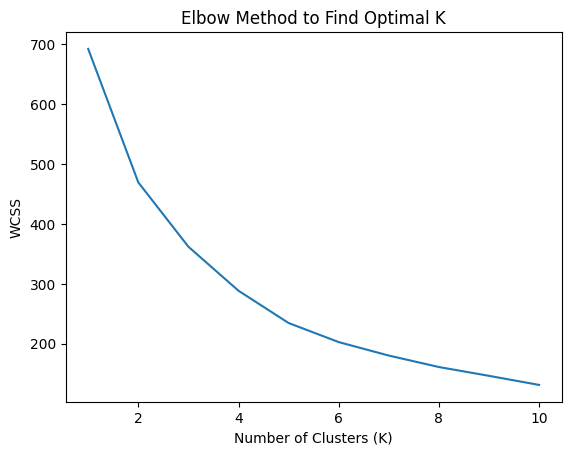

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


scaler = StandardScaler()
scaled_features = scaler.fit_transform(new_features.iloc[:, 1:])



wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.title('Elbow Method to Find Optimal K')
plt.show()


In [ ]:
# Train the K-means model
k = 3  # You can adjust this based on your elbow method analysis
kmeans = KMeans(n_clusters=k, random_state=42)
new_features['Cluster'] = kmeans.fit_predict(scaled_features)

# Analyze the clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_data = pd.DataFrame(cluster_centers, columns=new_features.columns[1:-1])
new_features['Cluster'] = new_features['Cluster'] + 1  # Start cluster numbering from 1



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
from sklearn.metrics import silhouette_score

# evaluate clustering
inertia = kmeans.inertia_ # Sum of squared distances of samples to their closest cluster center, the lower the better
print("Inertia:", inertia)
labels = kmeans.labels_
silhouette_avg = silhouette_score(scaled_features, labels) # Silhouette Coefficient, the higher the better (Silhouette score measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation))
print("Silhouette Score:", silhouette_avg)


Inertia: 361.9359031576776
Silhouette Score: 0.3095801085903805


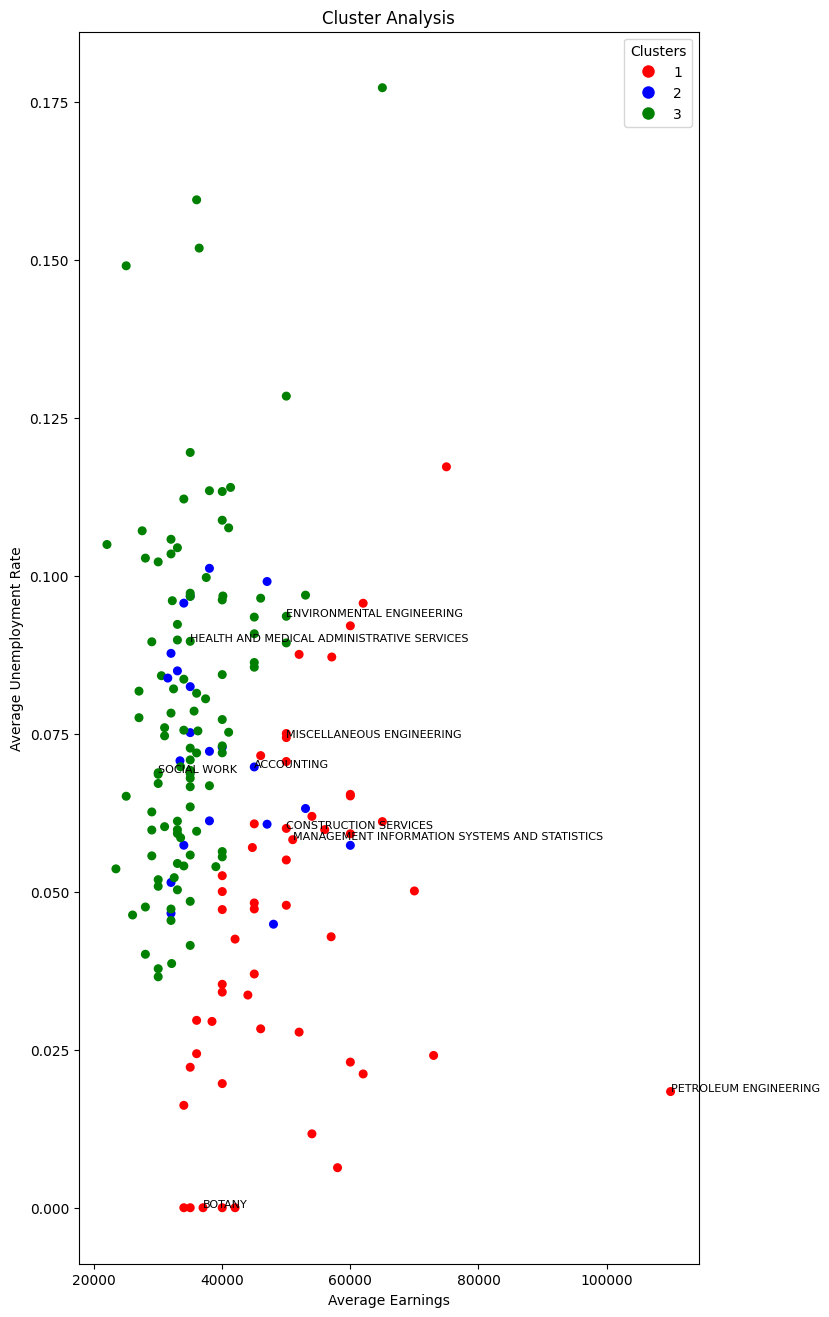

<ipython-input-10-363edaba4917>:27: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_stats = new_features.groupby('Cluster').mean()


In [ ]:

cluster_colors = {
    1: 'red',
    2: 'blue',
    3: 'green'
}


# Visualize the clusters (example for two features)
plt.figure(figsize=(8, 16))  # We can change the figure size
# scatter = plt.scatter(new_features['Average_Earnings'], new_features['Average_Unemployment_Rate'], c=new_features['Cluster'], cmap='viridis', s=30)
scatter = plt.scatter(new_features['Average_Earnings'], new_features['Average_Unemployment_Rate'], c=new_features['Cluster'].map(cluster_colors), s=30)

plt.xlabel('Average Earnings')
plt.ylabel('Average Unemployment Rate')
plt.title('Cluster Analysis')

for i, row in new_features.iterrows():
    if i % 20 == 0:  # To avoid clutter, annotate every 20th point
      plt.annotate(row['Major'], (row['Average_Earnings'], row['Average_Unemployment_Rate']), fontsize=8)

cluster_names = ['Cluster A', 'Cluster B', 'Cluster C']
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=name) for name, color in cluster_colors.items()]
plt.legend(handles=legend_elements, title='Clusters', fontsize=10)

plt.show()

cluster_stats = new_features.groupby('Cluster').mean()

best_clusters = cluster_stats.sort_values(by=['Average_Earnings', 'Average_Unemployment_Rate'], ascending=[False, True])

# Get the top N clusters with the best career prospects
n_top_clusters = 2
top_clusters = best_clusters.head(n_top_clusters)

# Find the majors within the top clusters
best_majors = new_features[new_features['Cluster'].isin(top_clusters.index)]


In [ ]:
best_majors

,Major,Average_Earnings,Average_Employment,Average_High_Wage_Job,Average_Unemployment_Rate,Cluster
0,ACCOUNTING,45000.0,165527.0,11417.0,0.069749,2
1,ACTUARIAL SCIENCE,62000.0,2912.0,1768.0,0.095652,1
3,AEROSPACE ENGINEERING,60000.0,11391.0,8184.0,0.065162,1
5,AGRICULTURE PRODUCTION AND MANAGEMENT,40000.0,12323.0,1925.0,0.050031,1
9,ARCHITECTURAL ENGINEERING,54000.0,2575.0,1665.0,0.061931,1
...,...,...,...,...,...,...
152,PSYCHOLOGY,31500.0,307933.0,125148.0,0.083811,2
158,SOCIAL PSYCHOLOGY,36000.0,1080.0,434.0,0.029650,1
161,SOCIOLOGY,33000.0,92721.0,29051.0,0.084951,2
162,SOIL SCIENCE,35000.0,613.0,355.0,0.000000,1


In [ ]:
#  majors that belong to cluster 1
new_features[new_features['Cluster'] == 1]['Major'].tolist()

['ACTUARIAL SCIENCE',
 'AEROSPACE ENGINEERING',
 'AGRICULTURE PRODUCTION AND MANAGEMENT',
 'ARCHITECTURAL ENGINEERING',
 'ASTRONOMY AND ASTROPHYSICS',
 'ATMOSPHERIC SCIENCES AND METEOROLOGY',
 'BIOLOGICAL ENGINEERING',
 'BIOMEDICAL ENGINEERING',
 'BOTANY',
 'CHEMICAL ENGINEERING',
 'CIVIL ENGINEERING',
 'COMPUTER ENGINEERING',
 'CONSTRUCTION SERVICES',
 'COURT REPORTING',
 'EDUCATIONAL ADMINISTRATION AND SUPERVISION',
 'ELECTRICAL ENGINEERING',
 'ELECTRICAL ENGINEERING TECHNOLOGY',
 'ELECTRICAL, MECHANICAL, AND PRECISION TECHNOLOGIES AND PRODUCTION',
 'ENGINEERING AND INDUSTRIAL MANAGEMENT',
 'ENGINEERING MECHANICS PHYSICS AND SCIENCE',
 'ENGINEERING TECHNOLOGIES',
 'GENERAL AGRICULTURE',
 'GENERAL ENGINEERING',
 'GENETICS',
 'GEOLOGICAL AND GEOPHYSICAL ENGINEERING',
 'GEOSCIENCES',
 'INDUSTRIAL AND MANUFACTURING ENGINEERING',
 'INDUSTRIAL PRODUCTION TECHNOLOGIES',
 'INFORMATION SCIENCES',
 'MANAGEMENT INFORMATION SYSTEMS AND STATISTICS',
 'MATERIALS ENGINEERING AND MATERIALS SCIENCE',

In [ ]:
#  majors that belong to cluster 2
new_features[new_features['Cluster'] == 2]['Major'].tolist()

['ACCOUNTING',
 'BIOLOGY',
 'BUSINESS MANAGEMENT AND ADMINISTRATION',
 'COMMERCIAL ART AND GRAPHIC DESIGN',
 'COMMUNICATIONS',
 'COMPUTER SCIENCE',
 'CRIMINAL JUSTICE AND FIRE PROTECTION',
 'ECONOMICS',
 'ELEMENTARY EDUCATION',
 'ENGLISH LANGUAGE AND LITERATURE',
 'FINANCE',
 'GENERAL BUSINESS',
 'GENERAL EDUCATION',
 'HISTORY',
 'MARKETING AND MARKETING RESEARCH',
 'MECHANICAL ENGINEERING',
 'NURSING',
 'PHYSICAL FITNESS PARKS RECREATION AND LEISURE',
 'POLITICAL SCIENCE AND GOVERNMENT',
 'PSYCHOLOGY',
 'SOCIOLOGY']

In [ ]:
#  c3
new_features[new_features['Cluster'] == 3]['Major'].tolist()

['ADVERTISING AND PUBLIC RELATIONS',
 'AGRICULTURAL ECONOMICS',
 'ANIMAL SCIENCES',
 'ANTHROPOLOGY AND ARCHEOLOGY',
 'APPLIED MATHEMATICS',
 'ARCHITECTURE',
 'AREA ETHNIC AND CIVILIZATION STUDIES',
 'ART AND MUSIC EDUCATION',
 'ART HISTORY AND CRITICISM',
 'BIOCHEMICAL SCIENCES',
 'BUSINESS ECONOMICS',
 'CHEMISTRY',
 'CLINICAL PSYCHOLOGY',
 'COGNITIVE SCIENCE AND BIOPSYCHOLOGY',
 'COMMUNICATION DISORDERS SCIENCES AND SERVICES',
 'COMMUNICATION TECHNOLOGIES',
 'COMMUNITY AND PUBLIC HEALTH',
 'COMPOSITION AND RHETORIC',
 'COMPUTER ADMINISTRATION MANAGEMENT AND SECURITY',
 'COMPUTER AND INFORMATION SYSTEMS',
 'COMPUTER NETWORKING AND TELECOMMUNICATIONS',
 'COMPUTER PROGRAMMING AND DATA PROCESSING',
 'COSMETOLOGY SERVICES AND CULINARY ARTS',
 'COUNSELING PSYCHOLOGY',
 'CRIMINOLOGY',
 'DRAMA AND THEATER ARTS',
 'EARLY CHILDHOOD EDUCATION',
 'ECOLOGY',
 'EDUCATIONAL PSYCHOLOGY',
 'ENVIRONMENTAL ENGINEERING',
 'ENVIRONMENTAL SCIENCE',
 'FAMILY AND CONSUMER SCIENCES',
 'FILM VIDEO AND PHOTOGRA

In [ ]:
cluster_stats

,Average_Earnings,Average_Employment,Average_High_Wage_Job,Average_Unemployment_Rate
Cluster,,,,
1,50350.00000,9991.711538,5753.576923,0.044346
2,34889.89899,17405.888889,7204.424242,0.079384
3,39090.47619,150021.285714,53248.047619,0.073100


from matplotlib import pyplot as plt
cluster_stats['Average_Earnings'].plot(kind='hist', bins=20, title='Average_Earnings')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_stats['Average_Employment'].plot(kind='hist', bins=20, title='Average_Employment')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_stats['Average_High_Wage_Job'].plot(kind='hist', bins=20, title='Average_High_Wage_Job')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_stats['Average_Unemployment_Rate'].plot(kind='hist', bins=20, title='Average_Unemployment_Rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_stats.plot(kind='scatter', x='Average_Earnings', y='Average_Employment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_stats.plot(kind='scatter', x='Average_Employment', y='Average_High_Wage_Job', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
cluster_stats.plot(kind='scatter', x='Average_High_Wage_Job', y='Average_Unemployment_Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Average_Employment']
  ys = series['Average_Earnings']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cluster_stats.sort_values('Average_Employment', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Average_Employment')
_ = plt.ylabel('Average_Earnings')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Average_Employment']
  ys = series['Average_Unemployment_Rate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cluster_stats.sort_values('Average_Employment', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Average_Employment')
_ = plt.ylabel('Average_Unemployment_Rate')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Average_Employment']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Average_Employment'}, axis=1)
              .sort_values('Average_Employment', ascending=True))
  xs = counted['Average_Employment']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cluster_stats.sort_values('Average_Employment', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Average_Employment')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Average_High_Wage_Job']
  ys = series['Average_Earnings']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = cluster_stats.sort_values('Average_High_Wage_Job', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Average_High_Wage_Job')
_ = plt.ylabel('Average_Earnings')

from matplotlib import pyplot as plt
cluster_stats['Average_Earnings'].plot(kind='line', figsize=(8, 4), title='Average_Earnings')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cluster_stats['Average_Employment'].plot(kind='line', figsize=(8, 4), title='Average_Employment')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cluster_stats['Average_High_Wage_Job'].plot(kind='line', figsize=(8, 4), title='Average_High_Wage_Job')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
cluster_stats['Average_Unemployment_Rate'].plot(kind='line', figsize=(8, 4), title='Average_Unemployment_Rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_0['Cluster'].plot(kind='hist', bins=20, title='Cluster')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Average_Earnings'].plot(kind='hist', bins=20, title='Average_Earnings')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Average_Employment'].plot(kind='hist', bins=20, title='Average_Employment')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Average_High_Wage_Job'].plot(kind='hist', bins=20, title='Average_High_Wage_Job')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Cluster', y='Average_Earnings', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Average_Earnings', y='Average_Employment', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Average_Employment', y='Average_High_Wage_Job', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Average_High_Wage_Job', y='Average_Unemployment_Rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Cluster']
  ys = series['Average_Earnings']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Cluster', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cluster')
_ = plt.ylabel('Average_Earnings')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Cluster']
  ys = series['Average_Unemployment_Rate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('Cluster', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cluster')
_ = plt.ylabel('Average_Unemployment_Rate')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Cluster']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Cluster'}, axis=1)
              .sort_values('Cluster', ascending=True))
  xs = counted['Cluster']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('Cluster', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Cluster')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Average_Employment']
  ys = series['Average_Earnings']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('Average_Employment', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Average_Employment')
_ = plt.ylabel('Average_Earnings')

from matplotlib import pyplot as plt
_df_12['Cluster'].plot(kind='line', figsize=(8, 4), title='Cluster')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['Average_Earnings'].plot(kind='line', figsize=(8, 4), title='Average_Earnings')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['Average_Employment'].plot(kind='line', figsize=(8, 4), title='Average_Employment')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['Average_High_Wage_Job'].plot(kind='line', figsize=(8, 4), title='Average_High_Wage_Job')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
top_clusters

,Average_Earnings,Average_Employment,Average_High_Wage_Job,Average_Unemployment_Rate
Cluster,,,,
1,50350.00000,9991.711538,5753.576923,0.044346
3,39090.47619,150021.285714,53248.047619,0.073100


# Random Forest

In [ ]:
# Baseline Model: linear regression evaluated on 75th percentile
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load and preprocess data
data = pd.read_csv('/content/recent-grads.csv')
data = data.dropna()
data = pd.get_dummies(data, columns=['Major_category'])

# Separate features and target variable
X = data.drop(['Median', 'Major', 'P75th', 'P25th', 'Rank'], axis=1)
y = data['P75th']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Baseline Model: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_linear_pred = linear_model.predict(X_test)

# RandomForestRegressor Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)

# Compare Mean Squared Error
mse_linear = mean_squared_error(y_test, y_linear_pred)
mse_rf = mean_squared_error(y_test, y_rf_pred)

print("Linear Regression Mean Squared Error:", mse_linear)
print("Random Forest Regressor Mean Squared Error:", mse_rf)



Linear Regression Mean Squared Error: 54873233.13503731
Random Forest Regressor Mean Squared Error: 46217119.0


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, mean_squared_error

data = pd.read_csv('/content/recent-grads.csv')
data = data.dropna()
data = pd.get_dummies(data, columns=['Major_category'])  # One-hot encode categorical variables if any

X = data.drop(['Median', 'Major', 'P75th', 'P25th', 'Rank'], axis=1)  # Exclude the target variable and non-informative columns
y = data['Median']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importance:")
print(feature_importance)


Mean Squared Error: 32334463.542857144
Feature Importance:
                                              Feature  Importance
22                         Major_category_Engineering    0.373691
4                                          ShareWomen    0.240945
0                                          Major_code    0.061167
11                                  Unemployment_rate    0.056871
3                                               Women    0.043497
12                                       College_jobs    0.033699
10                                         Unemployed    0.027888
14                                      Low_wage_jobs    0.020720
6                                            Employed    0.018516
2                                                 Men    0.018080
8                                           Part_time    0.015759
1                                               Total    0.014731
13                                   Non_college_jobs    0.014499
5                

In [ ]:

# Wtih 'Median' as the target variable, use columns starting with 'Major_category_'

major_category_columns = [col for col in data.columns if col.startswith('Major_category_')]

major_category_data = data[major_category_columns]

X = major_category_data
y = data['Median']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': model.feature_importances_})
print(feature_importance.sort_values(by='Importance', ascending=False))



Mean Squared Error: 37845868.6980924
                                              Feature  Importance
7                          Major_category_Engineering    0.761696
3                             Major_category_Business    0.075724
5              Major_category_Computers & Mathematics    0.049557
13                   Major_category_Physical Sciences    0.031390
14            Major_category_Psychology & Social Work    0.018479
9            Major_category_Humanities & Liberal Arts    0.015423
6                            Major_category_Education    0.014052
12                 Major_category_Law & Public Policy    0.008469
1                                 Major_category_Arts    0.006205
10  Major_category_Industrial Arts & Consumer Serv...    0.005849
15                      Major_category_Social Science    0.005041
8                               Major_category_Health    0.003471
2               Major_category_Biology & Life Science    0.002564
0      Major_category_Agriculture & Nat

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
import warnings

warnings.filterwarnings("ignore")

# Use GridSearchCV to find the best hyperparameters for the random forest regressor

target_variables = ['Unemployment_rate', 'Median', 'P75th', 'P25th','Employed', 'College_jobs', 'Low_wage_jobs']

for target_variable in target_variables:
    print(f"\nTarget Variable: {target_variable}")

    try:
        X = data.filter(like='Major_category_')
        y = data[target_variable]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        rf = RandomForestRegressor()

        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'max_features': ['auto', 'sqrt', 'log2']
        }

        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=0)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        mse = mean_squared_error(y_test, best_model.predict(X_test))
        print("Mean Squared Error:", mse)


        feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_model.feature_importances_})
        feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
        print("Feature Importance:")
        print(feature_importance)

    except Exception as e:
        print(f"Error occurred for target variable '{target_variable}': {str(e)}")
        continue



Target Variable: Unemployment_rate
Mean Squared Error: 0.0006164702698484035
Feature Importance:
                                              Feature  Importance
12                 Major_category_Law & Public Policy    0.216675
6                            Major_category_Education    0.135472
15                      Major_category_Social Science    0.126425
13                   Major_category_Physical Sciences    0.075339
5              Major_category_Computers & Mathematics    0.069101
9            Major_category_Humanities & Liberal Arts    0.067783
10  Major_category_Industrial Arts & Consumer Serv...    0.065347
0      Major_category_Agriculture & Natural Resources    0.055213
14            Major_category_Psychology & Social Work    0.052505
1                                 Major_category_Arts    0.033297
2               Major_category_Biology & Life Science    0.033252
7                          Major_category_Engineering    0.031771
8                               Major_catego

In [ ]:
y_test.head()

77     27968
139    16838
153     2840
61      1168
157     1141
Name: Low_wage_jobs, dtype: int64

In [ ]:
best_model.predict(X_test)

array([ 6125.06161315,  2058.07216729,  8574.83938889,  3278.36202145,
        3770.03655747,  8574.83938889,  6125.06161315,  1192.4701714 ,
        3770.03655747,  8574.83938889,  5435.05119932,  2061.43132688,
        1737.21194597,  8189.59220645,  2648.44859198,   854.89165401,
        3770.03655747,   854.89165401,  6125.06161315,  8574.83938889,
         854.89165401,   854.89165401,  5435.05119932,  3770.03655747,
        8189.59220645,  4826.53678184,   854.89165401,  1737.21194597,
         854.89165401,   854.89165401,  8574.83938889,   854.89165401,
        2061.43132688, 13539.83601669,  5435.05119932])

In [ ]:
# Categories are decided on arbitrary and estimated cutoffs, may need to discuss
# how to determine the classes for each categorical feature

# Create new numerical feature Employment_rate
data['Employment_rate'] = data['Employed'] / data['Total']
# Create new categorical feature dividing employment rate into 3 categories with
# cut off < 0.75, < 0.85, and >= 0.85, with class 1 represent the highest employment rate
bin_edges = [0, 0.75, 0.85, 1]
bin_labels = [3, 2, 1]
data['Employed_class'] = pd.cut(data['Employment_rate'], bins= bin_edges, labels=bin_labels)

# Create new numerical feature College_job_rate
data['College_job_rate'] = data['College_jobs'] / data['Total']
# Create new categorical feature dividing college job rate into 3 categories with
# cut off < 0.3, < 0.5, and >= 0.5, with class 1 represent the highest number of college jobs
bin_edges = [0, 0.3, 0.5, 1]
bin_labels = [3, 2, 1]
data['College_job_class'] = pd.cut(data['College_job_rate'], bins= bin_edges, labels=bin_labels)

# Create new numerical feature Low_wage_jobs_rate
data['Low_wage_jobs_rate'] = data['Low_wage_jobs'] / data['Total']
# Create new categorical feature dividing low wage job rate into 3 categories with
# cut off < 0.05, < 0.1, and >= 0.1, with class 1 represent the highest number of college jobs
bin_edges = [0, 0.05, 0.1, 1]
bin_labels = [3, 2, 1]
data['Low_wage_jobs_class'] = pd.cut(data['Low_wage_jobs_rate'], bins= bin_edges, labels=bin_labels)

In [ ]:
data = data.dropna()

In [ ]:

# Use GridSearchCV to find the best hyperparameters for the random forest regressor

warnings.filterwarnings("ignore")

target_variables = ['Employed_class', 'College_job_class', 'Low_wage_jobs_class']
# TODO: create categorical vars using cols like 'Employed', 'College_jobs', 'Low_wage_jobs' etc

for target_variable in target_variables:
    print(f"\nTarget Variable: {target_variable}")

    try:
        X = data.filter(like='Major_category_')
        y = data[target_variable]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        rf = RandomForestClassifier()

        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'max_features': ['auto', 'sqrt', 'log2']
        }

        grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='accuracy', verbose=0)
        grid_search.fit(X_train, y_train)

        best_model = grid_search.best_estimator_
        accuracy = best_model.score(X_test, y_test)
        print("Accuracy:", accuracy)

        feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': best_model.feature_importances_})
        feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
        print("Feature Importance:")
        print(feature_importance)

    except Exception as e:
        print(f"Error occurred for target variable '{target_variable}': {str(e)}")
        continue



Target Variable: Employed_class
Accuracy: 0.5588235294117647
Feature Importance:
                                              Feature  Importance
6                            Major_category_Education    0.248247
2               Major_category_Biology & Life Science    0.212074
0      Major_category_Agriculture & Natural Resources    0.110535
3                             Major_category_Business    0.051622
1                                 Major_category_Arts    0.050358
10  Major_category_Industrial Arts & Consumer Serv...    0.044901
13                   Major_category_Physical Sciences    0.043448
8                               Major_category_Health    0.039558
7                          Major_category_Engineering    0.034386
15                      Major_category_Social Science    0.032725
4          Major_category_Communications & Journalism    0.029466
5              Major_category_Computers & Mathematics    0.026473
9            Major_category_Humanities & Liberal Arts    0.0

In [ ]:
data

,Rank,Major_code,Major,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,...,Major_category_Law & Public Policy,Major_category_Physical Sciences,Major_category_Psychology & Social Work,Major_category_Social Science,Employment_rate,Employed_class,College_job_rate,College_job_class,Low_wage_jobs_rate,Low_wage_jobs_class
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,0.120564,36,1976,1849,...,0,0,0,0,0.844805,2,0.655836,1,0.082514,2
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,0.101852,7,640,556,...,0,0,0,0,0.846561,2,0.462963,2,0.066138,2
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,0.341631,289,25694,23170,...,0,0,0,0,0.796466,2,0.567700,1,0.030130,3
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,0.144967,17,1857,2038,...,0,0,0,0,0.721726,3,0.443840,2,0.094831,2
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,0.441356,51,2912,2924,...,0,0,0,0,0.770982,2,0.468096,2,0.068573,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,0.637293,47,6259,5043,...,0,0,0,0,0.744322,3,0.329528,2,0.088358,2
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,0.817099,7,2125,1848,...,0,0,1,0,0.744569,3,0.521374,1,0.028732,3
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,0.799859,13,2101,1724,...,0,0,1,0,0.740310,3,0.347428,2,0.219168,1
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,0.798746,21,3777,3154,...,0,0,1,0,0.816472,2,0.519455,1,0.066580,2
